In [102]:
from transformers import pipeline
import torch
from transformers import AutoModel, AutoTokenizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


In [103]:
# Initialize the text generation pipeline
generator = pipeline("text-generation", model="gpt2", device=-1)  # Use device=0 for GPU, or device=-1 for CPU
output = generator("Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A:", max_length=30, temperature=0.9, num_return_sequences=3)

#IDK se è utile ma ci sono modi per forzare le parole che genera. 

# Print the generated text
for idx, generated_text in enumerate(output):
    print(f"Generated Text {idx + 1}: {generated_text['generated_text']}")


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Italy. Q: What is
Generated Text 2: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Milan. Q: What is
Generated Text 3: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Milan. Q: What is


In [104]:

model = AutoModel.from_pretrained( "gpt2", output_hidden_states=True)  #load pretrained from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("gpt2")                     #trasforma input in token

In [110]:

#text = ["Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A:"]
text=["pear", "apple", "orange", "banana"]  #you can add more input

"""If the tokenizer being used doesn't already have a pad_token, this line assigns the eos_token (end-of-sequence token) as the padding token.
Padding is necessary when working with batches of varying sequence lengths to ensure all sequences have the same length."""
tokenizer.pad_token = tokenizer.eos_token

# Generate embeddings for multiple inputs
#tokenize input
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
print(inputs)

print(f"Batch size: { inputs["input_ids"].shape[0]}")  #print(N_of_input)


{'input_ids': tensor([[  431,   283],
        [18040, 50256],
        [43745, 50256],
        [ 3820,  2271]]), 'attention_mask': tensor([[1, 1],
        [1, 0],
        [1, 0],
        [1, 1]])}
Batch size: 4


In [111]:
# Get the model's outputs
with torch.no_grad():
    outputs = model(**inputs)

# Extract the hidden states
hidden_states = outputs.hidden_states  # dim->(batch size, sequence_length, hidden_size)
print(hidden_states)



(tensor([[[ 0.0135, -0.3651,  0.0232,  ..., -0.1219, -0.1720,  0.0284],
         [-0.0253, -0.1751, -0.1928,  ...,  0.2048, -0.1754,  0.1351]],

        [[ 0.1008, -0.3901,  0.2345,  ..., -0.0812, -0.1004, -0.1227],
         [ 0.0753, -0.0815, -0.0449,  ...,  0.0412,  0.1654,  0.1205]],

        [[-0.0340, -0.1402,  0.0893,  ..., -0.1466,  0.1908,  0.1484],
         [ 0.0753, -0.0815, -0.0449,  ...,  0.0412,  0.1654,  0.1205]],

        [[ 0.0833, -0.2190,  0.0753,  ..., -0.1383, -0.0266, -0.0706],
         [-0.1934, -0.1699, -0.1105,  ..., -0.0710, -0.2576,  0.1693]]]), tensor([[[ 0.4989, -2.3301,  1.1138,  ..., -0.1141,  0.8569, -0.1273],
         [-2.5326, -0.8460, -1.4901,  ..., -0.1130,  0.0218, -0.3458]],

        [[ 1.0389, -0.5693,  0.0695,  ...,  0.9786,  0.6406, -0.0963],
         [ 0.5586,  0.6627, -0.0115,  ...,  1.3753,  1.1653,  0.0897]],

        [[ 1.2281,  0.3953, -0.7972,  ...,  0.6017,  0.0364,  0.4298],
         [ 0.6965,  0.1239, -0.1137,  ...,  1.8569,  1.4987, -0

**PLOT EMBEDDING SPACE FOR A SPECIFIC BATCH**

0
torch.Size([768])


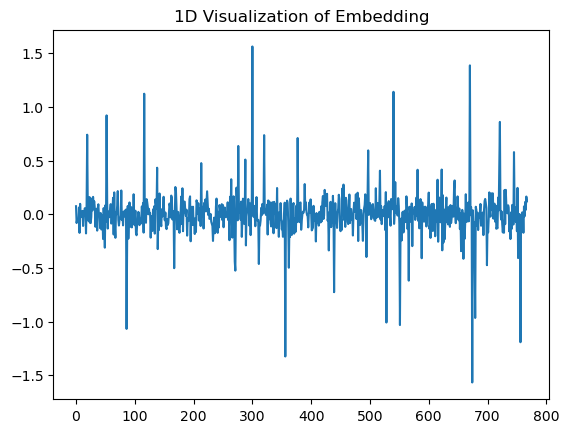

1
torch.Size([768])


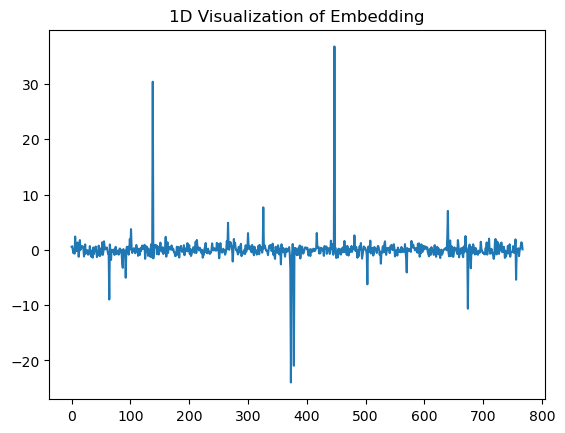

2
torch.Size([768])


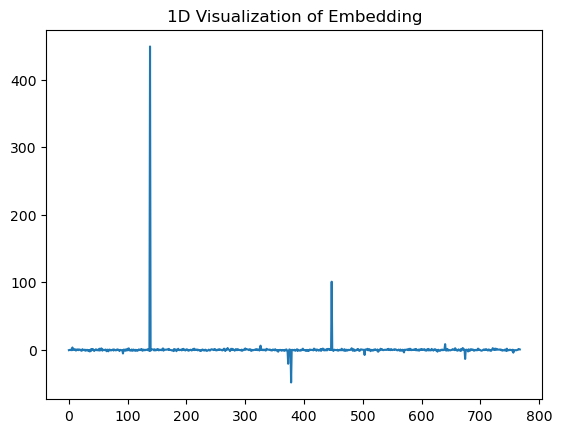

3
torch.Size([768])


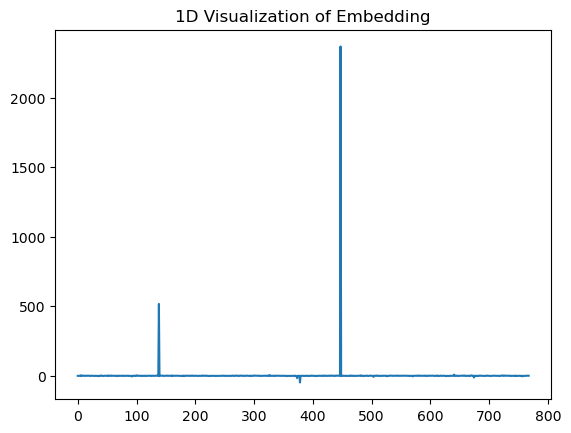

4
torch.Size([768])


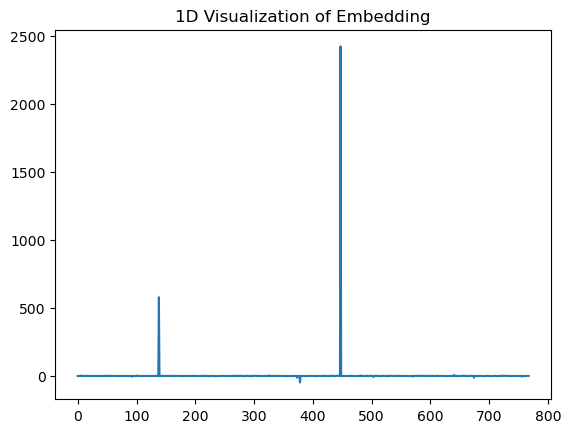

5
torch.Size([768])


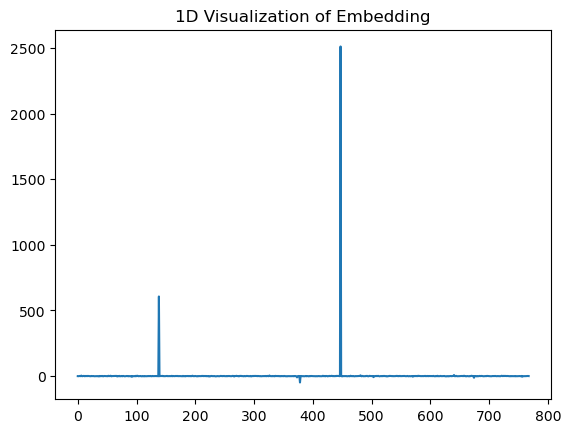

6
torch.Size([768])


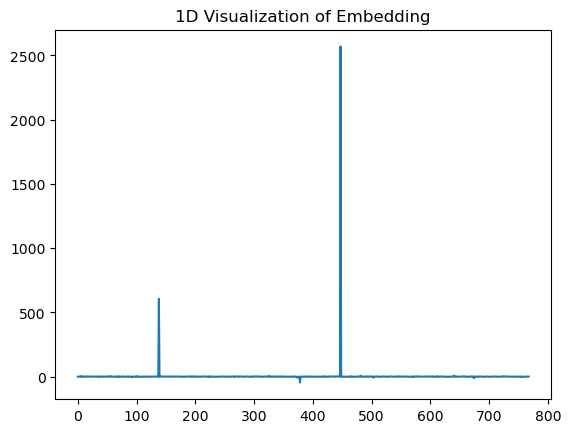

7
torch.Size([768])


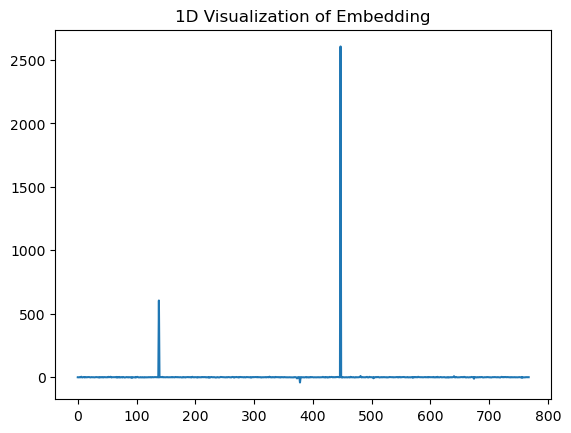

8
torch.Size([768])


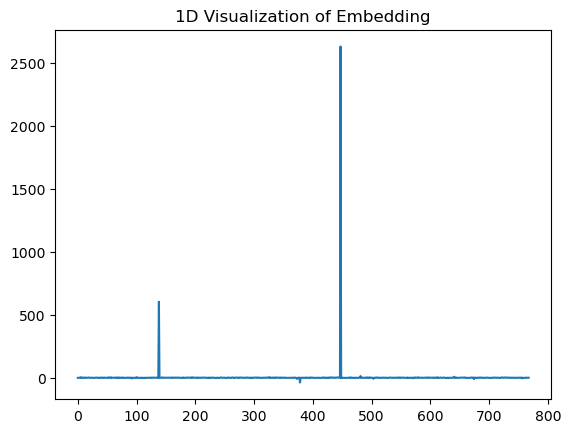

9
torch.Size([768])


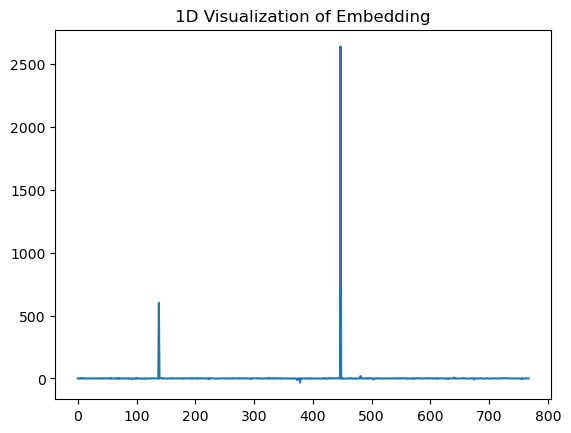

10
torch.Size([768])


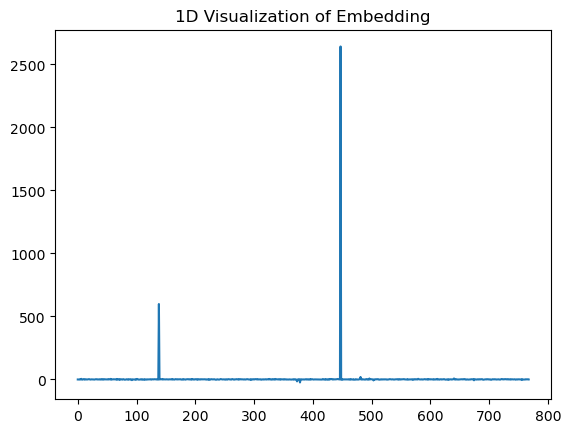

11
torch.Size([768])


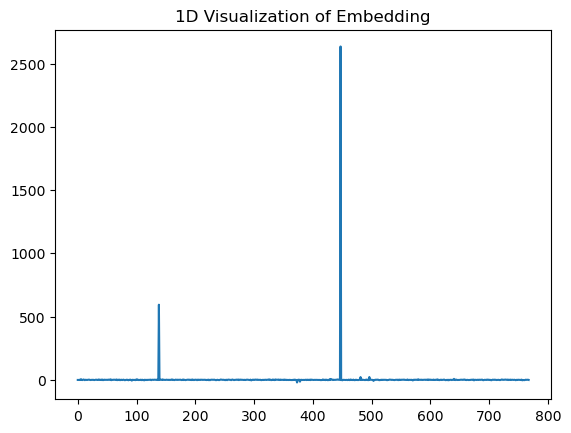

12
torch.Size([768])


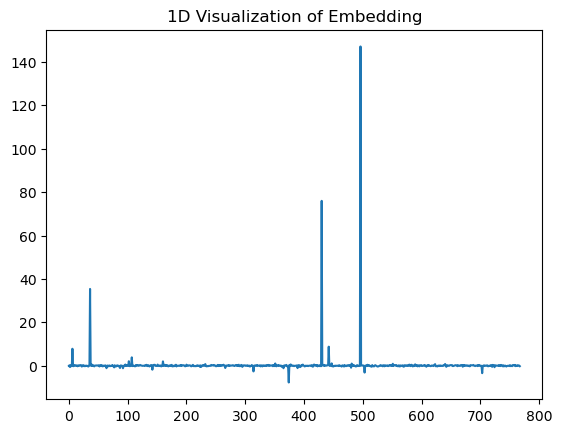

In [112]:

#ENTROPY 
#projection of that cevotrs

for i in range(len(hidden_states)):
    print(i)
    last_hidden_layer = hidden_states[i]
    embeddings = last_hidden_layer[1, -1, :]  # Shape: (batch_size, embedding_dim)  I'M TAKING FIRST TOKEN 
    print(embeddings.shape)
    plt.plot(embeddings.numpy().flatten())
    plt.title("1D Visualization of Embedding")
    plt.show()

**PLOT ALL BATCH TOGHEDER**

Layer 0
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


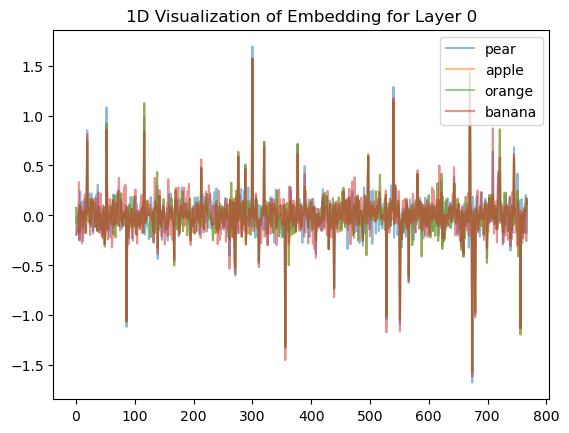

Layer 1
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


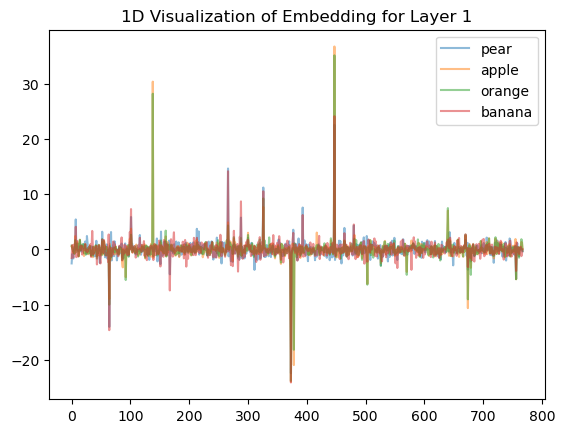

Layer 2
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


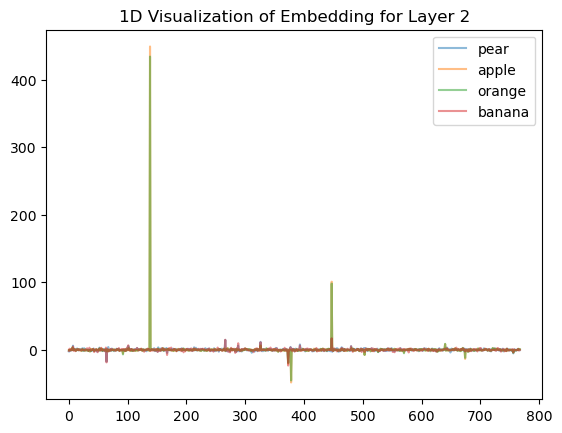

Layer 3
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


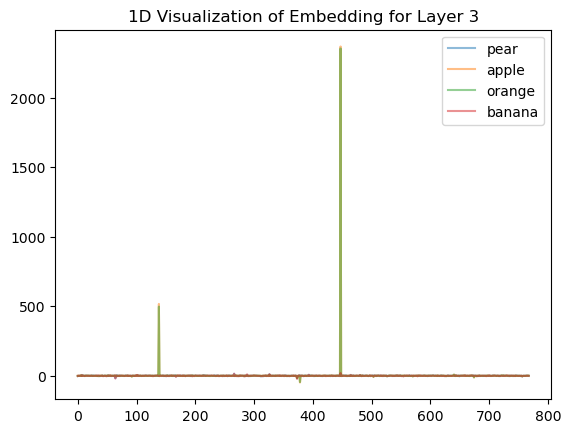

Layer 4
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


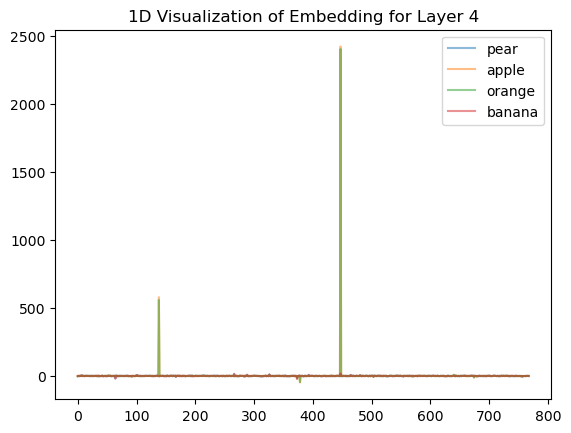

Layer 5
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


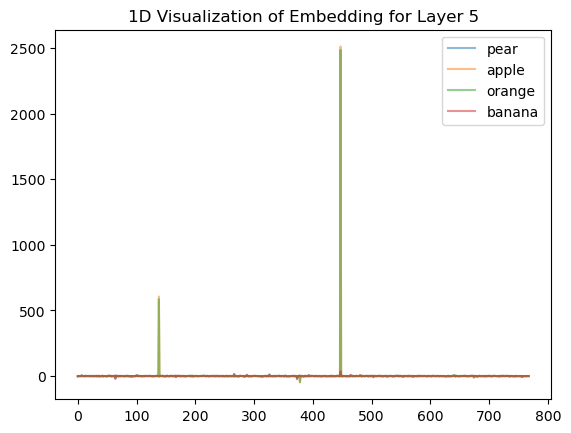

Layer 6
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


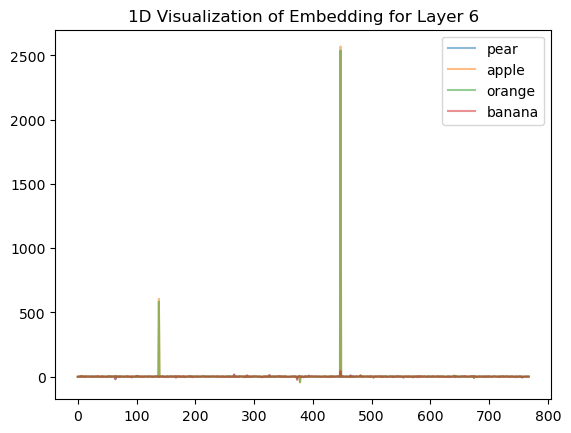

Layer 7
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


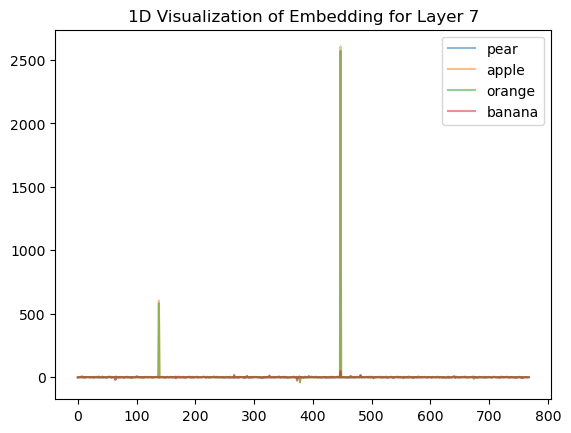

Layer 8
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


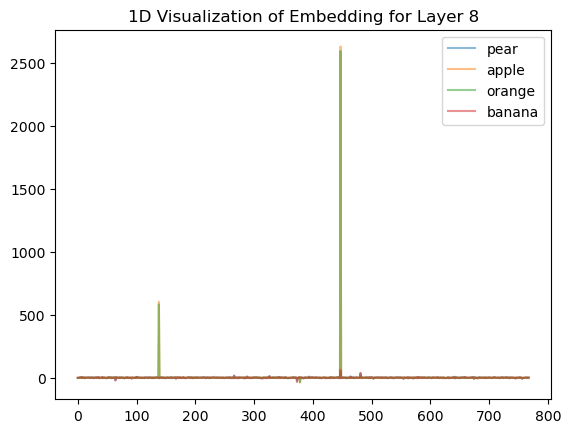

Layer 9
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


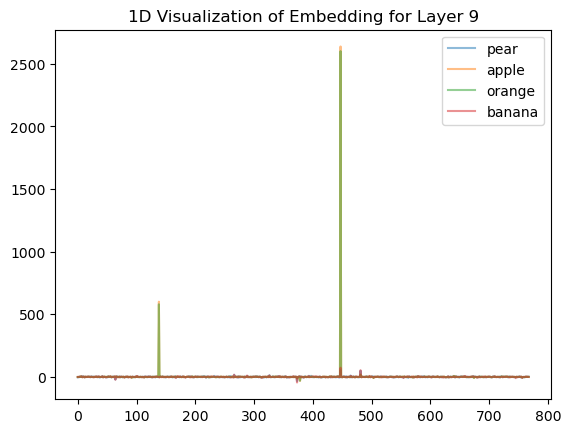

Layer 10
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


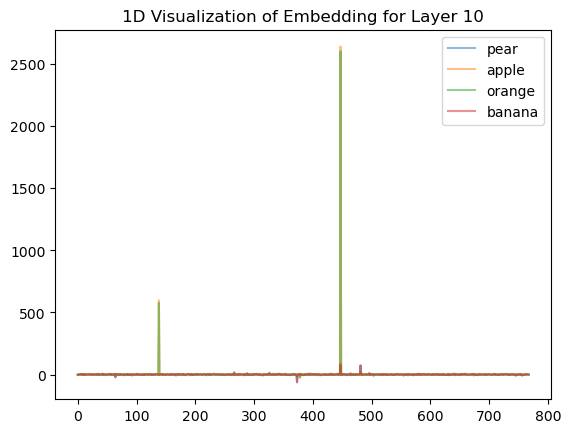

Layer 11
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


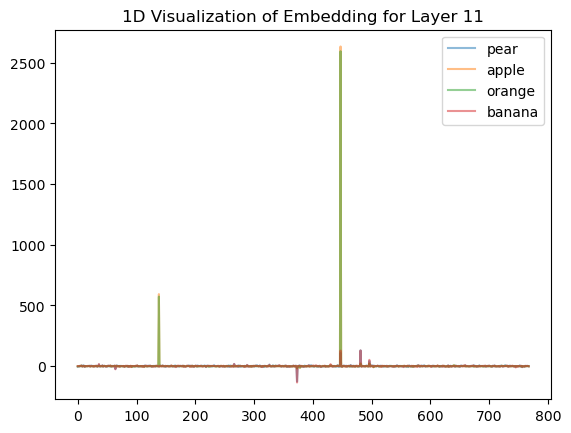

Layer 12
Batch 0 Embedding Shape: torch.Size([768])
Batch 1 Embedding Shape: torch.Size([768])
Batch 2 Embedding Shape: torch.Size([768])
Batch 3 Embedding Shape: torch.Size([768])


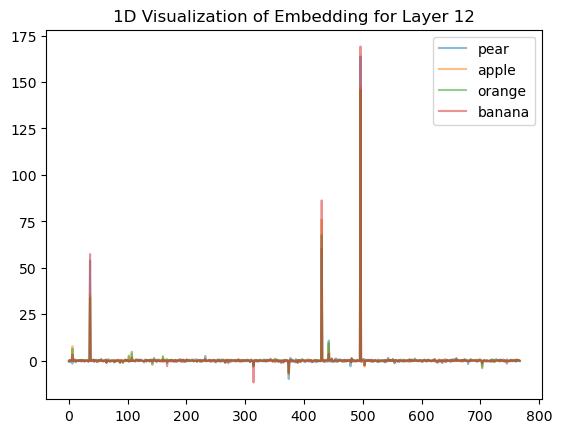

In [118]:
#FA SCHIFO, però ero curioso di vedere se ci fossero "correlazioni" in comune.
# secondo voi si può dire che nell'ultimo layer i picchi rappresentano le caratteristiche in comune (in questo caso-> frutta)?


for i in range(len(hidden_states)):
    print(f"Layer {i}")
    last_hidden_layer = hidden_states[i]  # Shape: (batch_size, sequence_length, hidden_size)
    
  
    for batch_idx in range(last_hidden_layer.shape[0]):  # batch dimension
        embeddings = last_hidden_layer[batch_idx, -1, :]  # Take the last token's embedding for each batch
        print(f"Batch {batch_idx} Embedding Shape: {embeddings.shape}")
        plt.plot(embeddings.numpy().flatten(), label=f"{text[batch_idx]}", alpha=0.5)
    

    plt.title(f"1D Visualization of Embedding for Layer {i}")
    plt.legend() 
    plt.show()

In [114]:

"""The value of each dimension indicates how strongly the input data correlates with that feature.
For example:

One dimension might encode sentiment (positive/negative).
Another dimension might encode part-of-speech information (noun, verb).
Yet another might encode syntactic relationships (subject, object).
However, these features are not human-interpretable, as they are learned automatically during training."""

"""Positive Values: Strong activation or alignment with the feature.
Negative Values: Negative correlation or opposite alignment with the feature.
Values Near Zero: Weak or no correlation with the feature."""

'Positive Values: Strong activation or alignment with the feature.\nNegative Values: Negative correlation or opposite alignment with the feature.\nValues Near Zero: Weak or no correlation with the feature.'

In [116]:
inputs

{'input_ids': tensor([[  431,   283],
        [18040, 50256],
        [43745, 50256],
        [ 3820,  2271]]), 'attention_mask': tensor([[1, 1],
        [1, 0],
        [1, 0],
        [1, 1]])}